---
title       : "Bootstrap"
subtitle    :
author      : Paul Schrimpf
date        : `j using Dates; print(Dates.today())`
bibliography: "bs.bib"
---

<a rel="license"
href="http://creativecommons.org/licenses/by-sa/4.0/"><img alt="Creative
Commons License" style="border-width:0"
src="https://i.creativecommons.org/l/by-sa/4.0/88x31.png"
/></a><br />This work is licensed under a <a rel="license"
href="http://creativecommons.org/licenses/by-sa/4.0/">Creative
Commons Attribution-ShareAlike 4.0 International License</a>.

### About this document {-}

This document was created using Weave.jl. The code is available in
[the course github
repository](https://github.com/ubcecon/ECON628_2018/paul). The same
document generates both static webpages and associated jupyter
notebooks.

$$
\def\indep{\perp\!\!\!\perp}
\def\Er{\mathrm{E}}
\def\R{\mathbb{R}}
\def\En{{\mathbb{E}_n}}
\def\Pr{\mathrm{P}}
\newcommand{\norm}[1]{\left\Vert {#1} \right\Vert}
\newcommand{\abs}[1]{\left\vert {#1} \right\vert}
\DeclareMathOperator*{\argmax}{arg\,max}
\DeclareMathOperator*{\argmin}{arg\,min}
\def\inprob{\,{\buildrel p \over \rightarrow}\,} 
\def\indist{\,{\buildrel d \over \rightarrow}\,} 
$$

# Introduction

The bootstrap is a method of inference that utilizes resampling. The
basic idea is as follows. Suppose you have some parameter of interest
for which you want to do inference. Let $T_n$ denote some test
statistic involving the estimator. The test 
statistic is a function of data, so the distribution of the estimator
is a function of the distribution of data. Let $F_0$
denote the exact, finite sample distribution of the data. Let 
$G_n(\tau, F_0) = \Pr(\hat{\theta}_n \leq \tau$ denote the
exact finite sample distribution of the statistic. To do inference, we
would like to know $G_n(\tau, F_0)$. This is generally impossible
without strong assumptions. Asymptotics get around this problem by
approximating $G_n(\tau, F_0)$ with its asymptotic distribution,
$G_\infty(\tau,F_0)$. The bootstrap is an alternative approach (but
the formal justification for the bootstrap still relies on
asymptotics). The bootstrap approximates $G_n(\tau, F_0)$ by replacing
$F_0$ with an estimate, $\hat{F}_n$. One common estimate of
$\hat{F}_n$ is simply the empirical CDF. When observations are
independent, we can randomly draw $T^*_n$ from 
$G_n(\tau, \hat{F}_n)$ by randomly drawing with replacement a sample
of size $n$ from the orgininal observations, and then computing
$T^*_n$ for this sample. We can do this repeatedly, and use
the distribution of the resulting $\hat{\theta}^*_n$'s to calculate
$G_n(\tau,\hat{F}_n)$. 


As a quick example, here's some code where the statistic is the sample
median minus its true value.

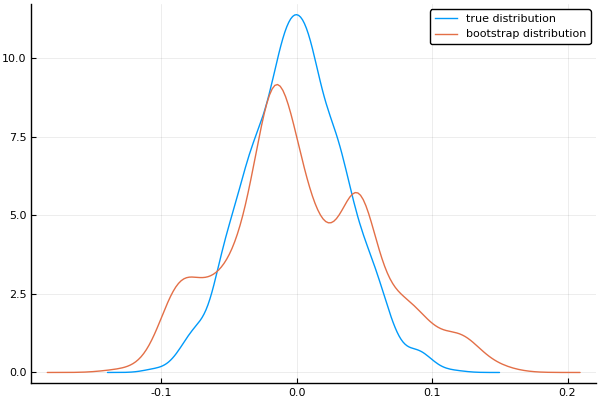

In [1]:
using StatPlots, Distributions
Plots.pyplot()
dgp(n) = rand(n).^2
estimator(x) = median(x)
# simulating T ~ G_n(τ,F_0)
n = 200
S = 1000
T = [estimator(dgp(n)) for s in 1:S] .- 0.25
function bootstrap(data, estimator, S)
  n = length(data)
  dist = Categorical(fill(1.0/n,n))
  θhat = estimator(data)
  T = [estimator(data[[rand(dist) for i in 1:n]]) for s in 1:S] .- θhat 
end
Tboot = bootstrap(dgp(n),estimator, S)
density(T, label="true distribution")
density!(Tboot, label="bootstrap distribution")

## References

@mackinnon2006 and @mackinnon2009 are good practical introductions to
the bootstrap. @horowitz2001 is also a good overview, and includes
more precise statements of theoretical results, but does not contain
proofs. @gine1997 is a rigorous and fairly self-contained
theoretical treatment of the bootstrap. Although the bootstrap works
in many situations, it does not always work. For example, @abadie2008
show the failure of the bootstrap for matching estimators. See
@andrews2000, @andrews2009, and @romano2012 for theoretical
developments on situations where the bootstrap fails.  @hall1994 gives
a theoretical overview of when the bootstrap provides asymptotic
refinement. @chernozhukov2017 discusses the bootstrap in high
dimensional models.

# Theory

This section follows the approach @van2000. We focus on the case where
$T_n = \frac{\hat{\theta}_n - \theta_0}{\hat{\sigma}_n}$ is a
t-statistic. A simple and useful result is that if $T_n$ and $T^*_n$
both converge to the same distribution, then the bootstrap is
consistent. 

<div class="theorem">
*Suppose that 
$$
T_n = \frac{\hat{\theta}_n - \theta_0}{\hat{\sigma}_n} \leadsto T
$$
and 
$$
T_n^* =  \frac{\hat{\theta}^*_n - \hat{\theta}_n}{\hat{\sigma}^*_n} \leadsto T
$$
conditional on the data, for some random variable $T$ with a
continuous distribution function. Then 
$$
| G_n(\tau, F_0) - G_n(\tau,\hat{F}_n) | \inprob 0
$$
and in particular,
$$
\Pr(\theta_0 \in [\hat{\theta}_n - G_n^{-1}(\alpha/2, \hat{F}_n)
\hat{\sigma}_n ,  \hat{\theta}_n - G_n^{-1}(1-\alpha/2, \hat{F}_n)
\hat{\sigma}_n ]) \to 1-\alpha.
$$
*
</div>

*Proof sketch:* $T_n$ and $T^*_n$ both $\leadsto T$ immediately
implies $G_n(\tau, F_0) \inprob G_\infty(\tau)$ and
$G_n(\tau,\hat{F}_n) \inprob G_\infty(\tau)$, where $G_\infty(\tau)$
is the CDF of $T$. This implies that 
$G^{-1}_n(\tau,\hat{F}_n) \inprob G^{-1}_\infty(\tau)$ for all $\tau$
where $G_\infty$ is continuous. Then we have
$$
\Pr(\theta_0 \geq \hat{\theta}_n - G_n^{-1}(\tau, \hat{F}_n)
 \hat{\sigma}_n) = \Pr(\frac{\theta_0 -
 \hat{\theta}_n}{\hat{\sigma}_n} \leq G_n^{-1}(\tau, \hat{F}_n) \to
 \Pr(T \leq G^{-1}_\infty(\tau)) = \tau.
$$

This theorem is very simple, but it is useful because it suggest a
simple path to showing the consistency of the bootstrap: simply show
that $T_n^*$ has the same asymptotic distribution as $T_n$. Here is a
simple result for when $T_n^*$ is constructed by sampling with
replacement from the empirical distribution. We will let
$\mathbb{P}_n$ denote the empirical distribution, and $x_i^*$ denote
draws of $x_i$ from it.

<div class="theorem>
*Let $x_1, x_2, ...$ be i.i.d. with mean $\mu$ and variance
$\sigma^2$. Then conditional on $x_1, ...$ for almost every sequence
$$
\sqrt{n} (\bar{x}_n^* - \bar{x}_n) \indist N(0,\sigma^2)
$$
*
</div>

**Proof sketch** it is straightforward to show that $\Er[x_i^* |
\mathbb{P}_n] = \bar{x}_n$ and $Var(x_i^*|\mathbb{P}_n) = \bar{x^2}_n
- \bar{x}_n^2 \to \sigma^2$. Applying the Lindeberg CLT then gives the
result.


## Pivotal statistics

The above results imply that the bootstrap works for both 
$S_n = \sqrt{n}(\bar{x}_n - \mu_0)$ and "studentized" a statistic 
$T_n = \sqrt{n}(\bar{x}_n - \mu_0)/\hat{\sigma}_n$. There is some
advantage to using the later. A statistic is called pivotal if its
distribution is completely known. If we assume $x_i \sim N$, then
$T_n$ is pivotal and has a t-distribution. If we aren't willing to
assume normality, then the distribution of $T_n$ is unknown, but its
asymptotic distribution is completely known, $N(0,1)$. Such a
statistic is called asymptotically pivotal. $S_n$ is not
asymptotically pivotal because its asymptotic distribution depends on
the unknown variance. It is possible to show that the bootstrap
distribution of asymptotically pivotal statistics converge faster than
either the usual asymptotic approximation or the bootstrap distribution of
non-pivotal statistics. See @hall1994 for details. 

Here is a simulation to illustrate.

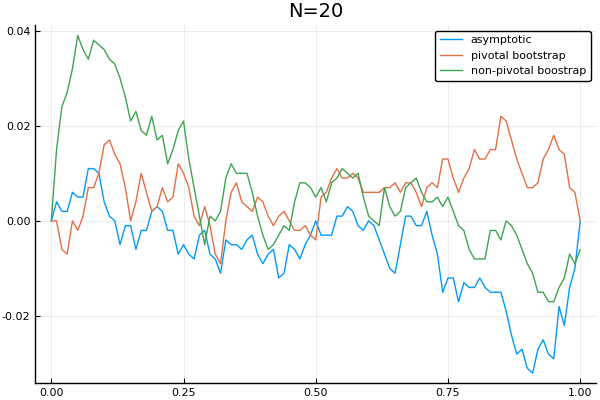

In [2]:
dgp(n) = rand(n)
estimator(x) = mean(x)
θ0 = 0.5
N = 5:5:20
B = 999
function simulatetests(n)
  function bootstrap(data, stat, S)
    n = length(data)
    dist = Categorical(fill(1.0/n,n))
    T = [stat(data[[rand(dist) for i in 1:n]]) for s in 1:S] 
  end
  data = dgp(n)
  t = sqrt(n)*(mean(data)-θ0)/std(data)
  [cdf(Normal(),t),   
   mean(t.<bootstrap(data, d->(sqrt(n)*(mean(d) - mean(data))/std(d)), B)),
   mean((mean(data)-θ0) .< bootstrap(data, d->(mean(d)-mean(data)), B))]
end
res=[hcat([simulatetests.(n) for s in 1:1000]...) for n in N]

p = 0:0.01:1
i = 1
plot(p, p->(mean(res[i][1,:].<p)-p), title="N=$(N[i])",  label="asymptotic")
plot!(p, p->(mean(res[i][2,:].<p)-p), title="N=$(N[i])", label="pivotal bootstrap")
plot!(p, p->(mean(res[i][3,:].<p)-p), title="N=$(N[i])", label="non-pivotal boostrap")

i = 4
plot(p, p->(mean(res[i][1,:].<p)-p), title="N=$(N[i])",  label="asymptotic")
plot!(p, p->(mean(res[i][2,:].<p)-p), title="N=$(N[i])", label="pivotal bootstrap")
plot!(p, p->(mean(res[i][3,:].<p)-p), title="N=$(N[i])", label="non-pivotal boostrap")

In this simulation design it appears impossible to see the difference
in performance. Theoretically, the difference in convergence rates is
something like $n^{-1/2}$ vs $n^{-1/3}$, so it we really do need to
have the right simulation design and method of visualizing the results
to see the difference.

## Bootstrap does not always work

It is important to remember that the bootstrap is not guaranteed to
work. A classic example is estimating the mean squared. 
Let $x_i \sim F_0$, where$F_0$ is any distribution with mean
$\mu$ and variance $\sigma^2$. The parameter of interest is $\theta = \mu^2$. The estimator
will be $\hat{\theta} = \bar{x}^2$.  The delta method and CLT imply 
$$
    \sqrt{n}(\bar{x}^2 - \mu^2) \indist 2\mu N(0,\sigma^2)
$$
similarly conditional on the data,
$$
    \sqrt{n}(\bar{x^*}^2 - \bar{x}^2) \indist 2 \mu N(0,\sigma^2)$
$$
A problem occurs when $\mu=0$. The limiting distributions become point
masses at 0. The CDF is no longer continuous, so the theorem above
does not apply. 

Here's an illustration [*Note: I intentionally left a bug in this
code, can you spot it?*]:

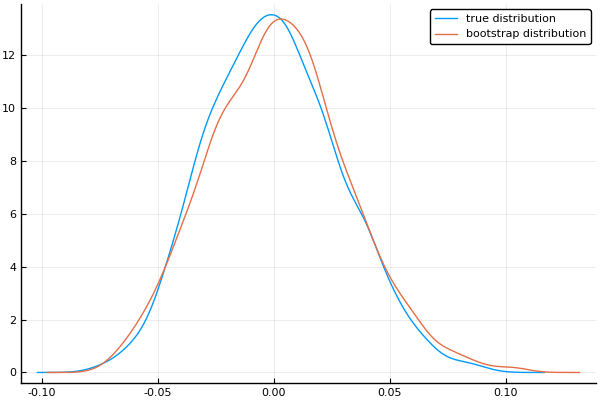

In [3]:
using StatPlots, Distributions
Plots.pyplot()
function bootmeansquared(μ0, n)
  dgp(n) = rand(n) .- 0.5 .+ μ0
  estimator(x) = mean(x)^2  
  S = 1000
  T = [estimator(dgp(n)) for s in 1:S] .- μ0^2
  function bootstrap(data, estimator, S)
    n = length(data)
    dist = Categorical(fill(1.0/n,n))
    θhat = estimator(data)
    [estimator(data[[rand(dist) for i in 1:n]]) for s in 1:S] .- θhat 
  end
  Tboot = bootstrap(dgp(n),estimator, S)
  density(T, label="true distribution")
  density!(Tboot, label="bootstrap distribution")
end
bootmeansquared(0.5,100)

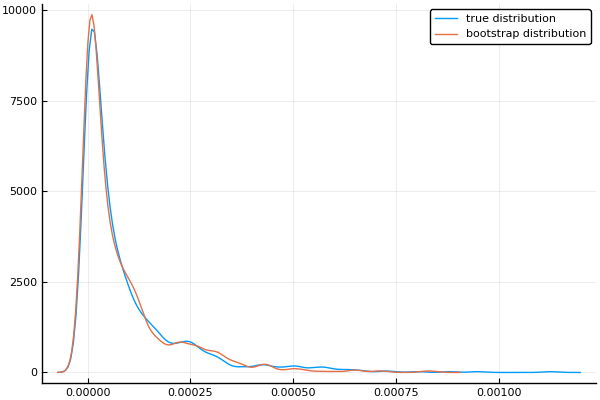

In [4]:
bootmeansquared(0.0,1000)

<!-- A procedure related to bootstrap that can work under conditions where -->
<!-- bootstrap fails is subsampling. -->
<!-- ```julia -->
<!-- using StatPlots, StatsBase -->
<!-- Plots.pyplot() -->
<!-- function subsamplemeansquared(μ0, n) -->
<!--   function subsample(data, estimator, m, S) -->
<!--     θhat = estimator(data) -->
<!--     sqrt(m)*([estimator(sample(data, m, replace=false)) for s in 1:S] .- θhat) -->
<!--   end -->
<!--   dgp(n) = rand(n) .- 0.5 .+ μ0 -->
<!--   estimator(x) = mean(x)^2   -->
<!--   S = 1000 -->
<!--   T = ([estimator(dgp(n)) for s in 1:S] .- μ0^2)*sqrt(n) -->
<!--   Tboot = subsample(dgp(n),estimator, Int64(round(n^(2/3))),S) -->
<!--   density(T, label="true distribution") -->
<!--   density!(Tboot, label="subsample distribution") -->
<!-- end -->
<!-- subsamplemeansquared(0.5,1000) -->
<!-- ``` -->

<!-- ```julia -->
<!-- subsamplemeansquared(0.0,1000) -->
```